[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a) Color of the rainbow
b) # of children
c) # of cars owned
d) Temperature of water

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

In [75]:
x = carbon_west["CO2"]

Part a. Construct a histogram of CO2 emissions.

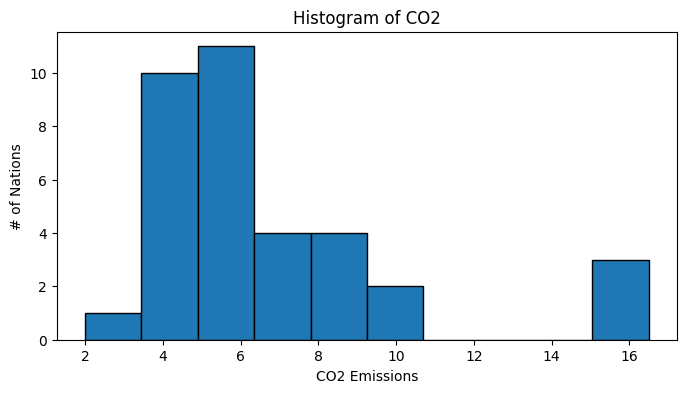

In [76]:
plt.figure(figsize=(8, 4))
plt.hist(carbon_west["CO2"], bins=10, edgecolor='black')
plt.title('Histogram of CO2')
plt.xlabel("CO2 Emissions")
plt.ylabel('# of Nations')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [77]:
print("mean: ", np.mean(carbon_west["CO2"]))
print("median: ", np.median(carbon_west["CO2"]))
print("std: ", np.std(carbon_west["CO2"]))

mean:  6.717142857142858
median:  5.9
std:  3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [78]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murdersMinusDc = murders[murders["state"] != "DC"]

In [79]:
murders.head()

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6


Part a. Find the mean and standard deviation for murders without D.C.

In [80]:
print("mean: ", np.mean(murdersMinusDc["murder"]))
print("std: ", np.std(murdersMinusDc["murder"]))

mean:  4.874
std:  2.560297638947472


Part b. Find the five-number  summary without D.C.

In [81]:
print("min: ", np.min(murdersMinusDc["murder"]))
print("max: ", np.max(murdersMinusDc["murder"]))
print("median: ", np.median(murdersMinusDc["murder"]))
print("Q1: ", np.percentile(murdersMinusDc["murder"], 25))
print("Q3: ", np.percentile(murdersMinusDc["murder"], 75))
print("IQR: ", np.percentile(murdersMinusDc["murder"], 75) - np.percentile(murdersMinusDc["murder"], 25))
print("range: ", np.max(murdersMinusDc["murder"])-np.min(murdersMinusDc["murder"]))

min:  1.0
max:  12.4
median:  4.85
Q1:  2.625
Q3:  6.175
IQR:  3.55
range:  11.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

The mean and range are impacted more with this outlier included.

In [82]:
print("mean: ", np.mean(murders["murder"]))
print("median: ", np.median(murders["murder"]))
print("min: ", np.min(murders["murder"]))
print("max: ", np.max(murders["murder"]))
print("Q1: ", np.percentile(murders["murder"], 25))
print("Q3: ", np.percentile(murders["murder"], 75))
print("IQR: ", np.percentile(murders["murder"], 75) - np.percentile(murders["murder"], 25))
print("range: ", np.max(murders["murder"])-np.min(murders["murder"]))

mean:  5.252941176470588
median:  5.0
min:  1.0
max:  24.2
Q1:  2.6500000000000004
Q3:  6.45
IQR:  3.8
range:  23.2


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [83]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


Part a. Construct a scatterplot between square feet and price of a home.

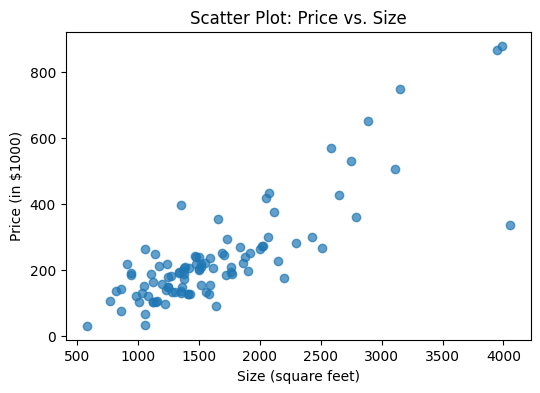

In [84]:
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Price vs. Size')
plt.xlabel('Size (square feet)')
plt.ylabel('Price (in $1000)')

plt.show()

Part b. Find the correlation between the two variables.

In [85]:
correlation = houses["size"].corr(houses["price"])
print("Correlation between size and price: ", correlation)

Correlation between size and price:  0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

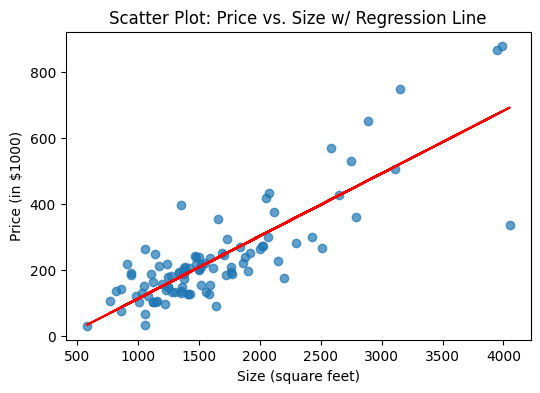

In [89]:
x = houses[['size']]
y = houses['price']
model = LinearRegression()
model.fit(x, y)

plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Price vs. Size w/ Regression Line')
plt.xlabel('Size (square feet)')
plt.ylabel('Price (in $1000)')

plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

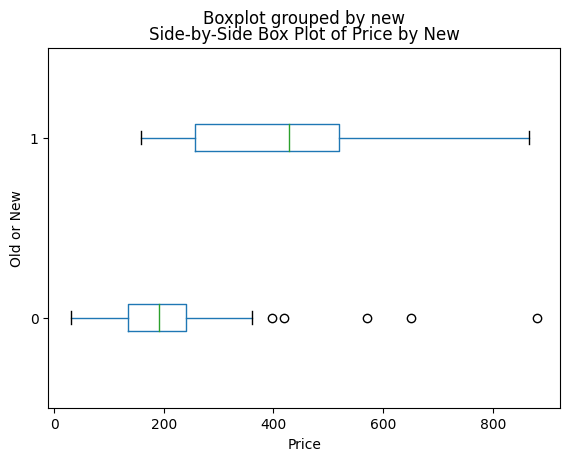

In [96]:
new = houses[houses["new"] == 1]
old = houses[houses['new'] != 1]
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of Price by New')
plt.xlabel('Price')
plt.ylabel('Old or New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

The relationship between size and price is a strong positive correlation meaning that as the size of the home increases, the price of the home also increases.
From the boxplots, it looks like newer homes are generally priced higher than older homes with the density of new homes priced higher than older homes.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [98]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")
happy.head()

,subject,happiness,marital,gender
0,1,1 1,male,NaN
1,2,1 1,male,NaN
2,3,1 1,male,NaN
3,4,1 1,male,NaN
4,5,1 1,male,NaN


In [99]:
pd.crosstab(happy["marital"],happy["happiness"])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
